<h1>Email Spam Classification</h1>

In [1]:
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data = pd.read_csv("messages.csv", error_bad_lines=False)
data.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
data.shape

(2893, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [5]:
data['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [6]:
data.isnull().any()

subject     True
message    False
label      False
dtype: bool

In [7]:
data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [8]:
print("Spam email: ", round(len(data[data['label']==0]) / len(data['label']),2)*100)
print("Not Spam email: ",round(len(data[data['label']==1]) / len(data['label']),2)*100)

Spam email:  83.0
Not Spam email:  17.0


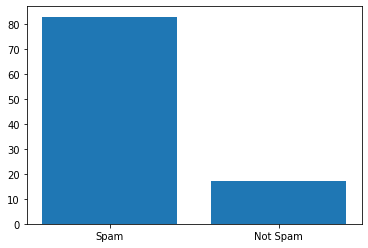

In [9]:
x=["Spam", "Not Spam"]
y=[83,17]
plt.bar(x,y)
plt.show()

no_not_spam  2412
no_spam 481


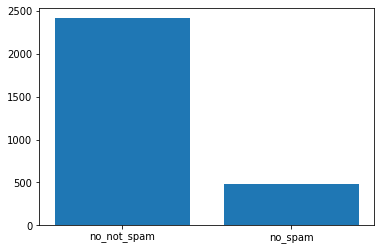

In [10]:
no_not_spam=len(data[data['label']==0])
no_spam=len(data[data['label']==1])
x=["no_not_spam","no_spam"]
y=[no_not_spam,no_spam]
plt.bar(x,y)
print("no_not_spam ",no_not_spam)
print("no_spam", no_spam)
plt.show()

In [11]:
data['message'] = data['message'].str.lower()

In [12]:
data['length'] = data.message.str.len()
data.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


<h2>Text Cleaning by removing stop words, special characters</h2>

In [13]:
# Replace email addresses with 'email'
data['message'] = data['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
data['message'] = data['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['message'] = data['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['message'] = data['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
data['message'] = data['message'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
data['message'] = data['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
data['message'] = data['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
data['message'] = data['message'].str.replace(r'^\s+|\s+?$', '')

In [14]:
data.head()

,subject,message,label,length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [15]:
from nltk.corpus import stopwords

In [16]:
stop_words = set(stopwords.words('english'))
data['message'] = data['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [17]:
data['new_length'] = data.message.str.len()
data.head()

,subject,message,label,length,new_length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856,2192
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1475
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1084
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [18]:
print("Original length: ", data.length.sum())
print("New length: ",data.new_length.sum())
print("Number of stop words removed: ",data.length.sum()-data.new_length.sum())

Original length:  9344743
New length:  6853758
Number of stop words removed:  2490985


In [19]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


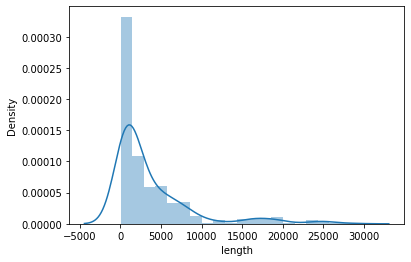

In [20]:
sns.distplot(data[data['label']==1]['length'], bins=20, label = "Spam")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


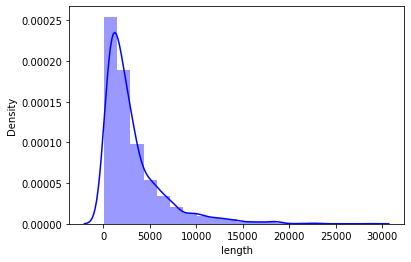

In [21]:
sns.distplot(data[data['label']==0]['length'],bins=20, label='Not Spam',color='b')

<h2>Word Cloud shows most repeated words<h2>

In [22]:
from wordcloud import WordCloud

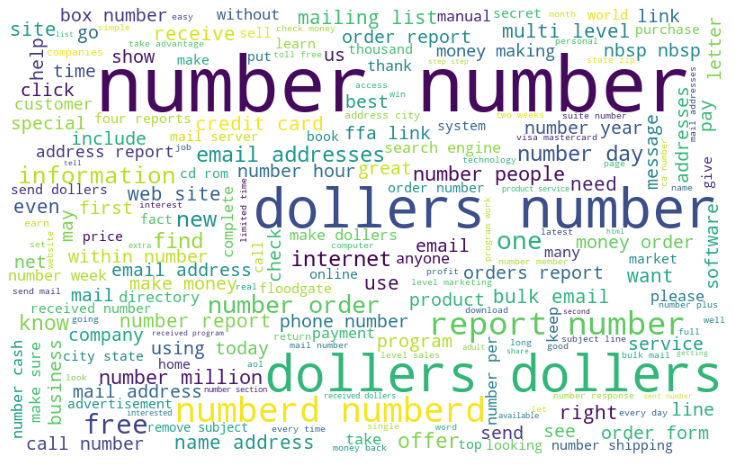

In [23]:
spams = data['message'][data['label']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white').generate(' '.join(spams))

plt.figure(figsize=(10,8))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

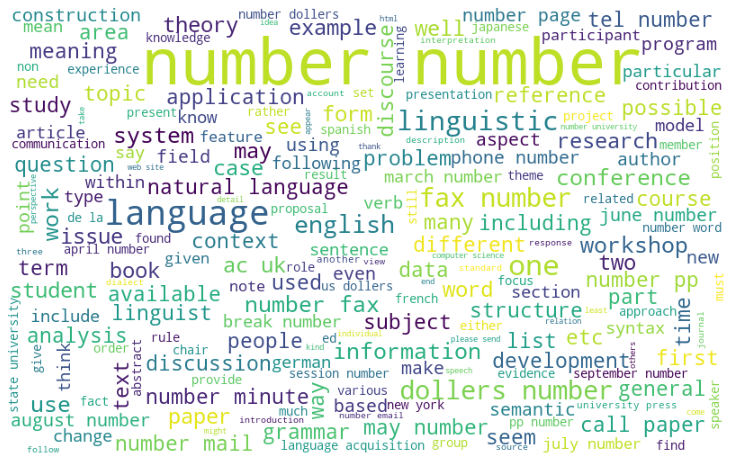

In [24]:
not_spams = data['message'][data['label']==0]

not_spam_cloud = WordCloud(width=800,height=500,background_color='white').generate(' '.join(not_spams))

plt.figure(figsize=(10,8))
plt.imshow(not_spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<h2>SVM Model</h2>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [26]:
text = []
for i in range (0,2892):
  text.append(data['message'])

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['message']).toarray()
Y = data.iloc[:, 2].values
print(Y)

[0 0 0 ... 0 0 0]


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[469   5]
 [  1 104]]


0.9896373056994818

In [34]:
# iptxt="hi , would you like to earn an extra $ 700 a week . . . $ 2 , 800 a month just by mailing our business circulars from your home ? you can make this kind of money without even giving up your present job . we have created the most risk-free way to do this , and all you have to do is mail out our business circulars and get paid for your work . this exciting new home employment opportunity is so effective - yet quick and easy that your success is absolutely guaranteed ! we publish , sell and distribute information booklets , guides , reports , manuals and computer software all across canada and the united states . since we do the majority of our business by mail , we in turn send out thousands of our sales circulars each week . our company circulars are the sales letters / product offers that are sent out in response to customer inquiries . when you mail our circulars , you  ll be greatly helping us by getting our offers out to more customers . you  ll be taking part in the most remarkable opportunity available . our system of mailing circulars is very easy to operate . all you will be doing is taking copies of the standard , letter-sized ( 8 1 / 2  x11  ) circulars that we provide you with and fold them to fit into the envelopes you will receive . after you have folded and inserted the circulars into the envelopes , you just have to seal the envelopes and deposit them in your mail . you will not have to spend any time addressing envelopes or pay any post..."
iptxt = input("Enter text: ")
inp = iptxt.lower()

inp=cv.transform([inp]).toarray()
op = classifier.predict(inp)
if op[0] == 1:
  print("Spam message")
else:
  print("Not a Spam message")
print(op)


Enter text: hi , would you like to earn an extra $ 700 a week . . . $ 2 , 800 a month just by mailing our business circulars from your home ? you can make this kind of money without even giving up your present job . we have created the most risk-free way to do this , and all you have to do is mail out our business circulars and get paid for your work . this exciting new home employment opportunity is so effective - yet quick and easy that your success is absolutely guaranteed ! we publish , sell and distribute information booklets , guides , reports , manuals and computer software all across canada and the united states . since we do the majority of our business by mail , we in turn send out thousands of our sales circulars each week . our company circulars are the sales letters / product offers that are sent out in response to customer inquiries . when you mail our circulars , you  ll be greatly helping us by getting our offers out to more customers . you  ll be taking part in the mos

In [33]:
import pickle
filename='email_spam_detect.pkl'
M=open(filename,'wb')
pickle.dump(classifier,M)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
M.close()